# Raphaela Challita's Open Data Project - CODE1161 | z5316585

# Walmart, Inc 

Walmart, Inc. is a US-based multinational retail corporation that operates chains of discount department stores, grocery stores, and hypermarkets. The company operates through three reportable segments namely; Walmart U.S., Walmart International, and Sam’s Club. Walmart offers a diversified range of merchandise and services at everyday low prices.

Walmart over the past decade and more has experience almost exponential growth within their sales and franchise.

In [414]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from pandas import DataFrame
from matplotlib import rc


In [296]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [297]:
saved_style_state = matplotlib.rcParams.copy() 

In [369]:
filepath = "XLS_files\walmart_chart.xlsx"
print("loading from file")

walmart_chart = pd.read_excel(filepath)
print("done")

loading from file
done


In [370]:
walmart_chart.head(50)

,Year,US$ Bn
0,2006,308.95
1,2007,344.76
2,2008,373.82
3,2009,401.09
4,2010,404.74
5,2011,418.50
6,2012,443.42
7,2013,465.60
8,2014,473.08
9,2015,482.23


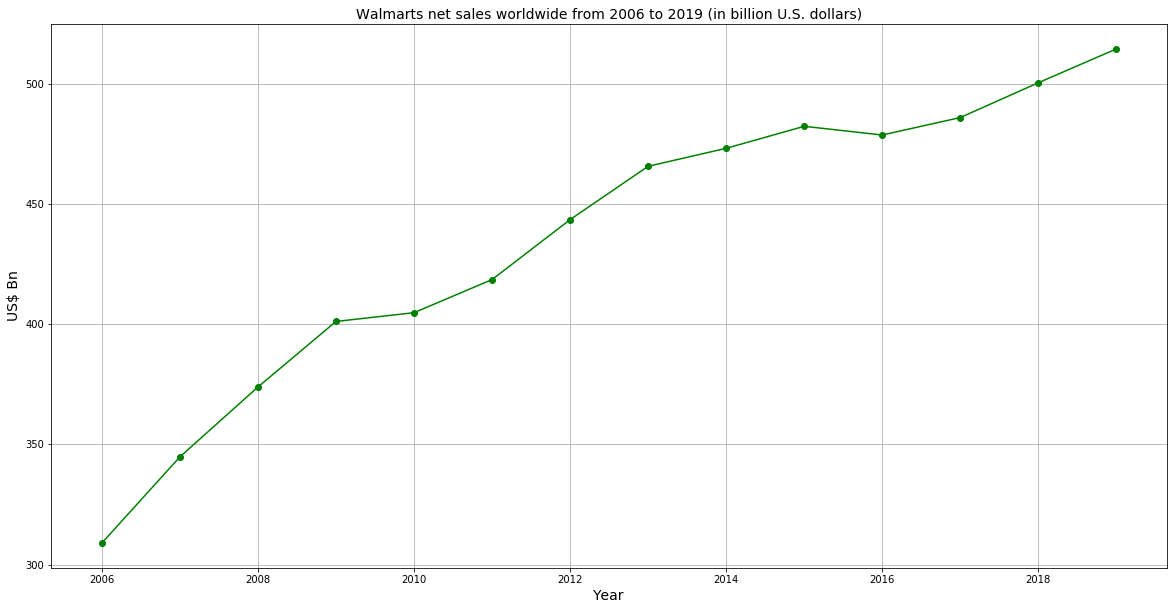

In [301]:

Data = {'Year': [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
        'US$ Bn': [308.95, 344.76, 373.82, 401.09, 404.74, 418.50, 443.42, 465.60, 473.08, 482.23, 478.61, 485.87, 500.34, 514.41]
       }
  
df = pd.DataFrame(Data,columns=['Year','US$ Bn'])
  
plt.plot(df['Year'], df['US$ Bn'], color='green', marker='o')
plt.title('Walmarts net sales worldwide from 2006 to 2019 (in billion U.S. dollars)', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('US$ Bn', fontsize=14)
plt.grid(True)
plt.show()

In [302]:
from pandas import ExcelWriter
from pandas import ExcelFile

excel_data_df = pd.read_excel('XLS_files\walmart_chart.xlsx', sheet_name='Chart 2', skiprows= 1)

In [303]:
# Walmart's net sales worldwide from 2008 to 2019, by division (in billion U.S. dollars)

In [304]:
excel_data_df.head(50)

,US$ Bn,Walmart U.S.,Walmart International,Sam's Club
0,2008,238.92,90.57,44.34
1,2009,256.97,96.14,47.98
2,2010,259.92,97.41,47.81
3,2011,260.26,109.23,49.46
4,2012,264.19,125.44,53.80
5,2013,274.43,134.75,56.42
6,2014,279.41,136.51,57.16
7,2015,288.05,136.16,58.02
8,2016,298.38,123.41,56.83
9,2017,307.83,116.12,57.37


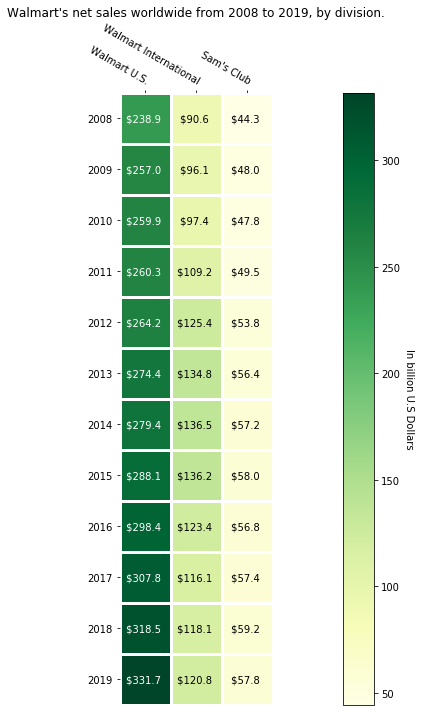

In [305]:
matplotlib.axes.Axes.imshow
matplotlib.pyplot.imshow
matplotlib.figure.Figure.colorbar
matplotlib.pyplot.colorbar


year = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
company = ["Walmart U.S.", "Walmart International", "Sam's Club"]

dollar = np.array([[238.92, 90.57, 44.34],
                    [256.97, 96.14, 47.98],
                    [259.92, 97.41, 47.81],
                    [260.26, 109.23, 49.46],
                    [264.19, 125.44, 53.80],
                    [274.43, 134.75, 56.42],
                    [279.41, 136.51, 57.16],
                    [288.05, 136.16, 58.02],
                    [298.38, 123.41, 56.83],
                    [307.83, 116.12, 57.37],
                    [318.48, 118.07, 59.22],                    
                    [331.67, 120.82, 57.84]])
        

def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    
    if not ax:
        ax = plt.gca()

    im = ax.imshow(data, **kwargs)

    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

   
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

fig, ax = plt.subplots()

im, cbar = heatmap(dollar, year, company, ax=ax,
                   cmap="YlGn", cbarlabel="US$ Bn")
texts = annotate_heatmap(im, valfmt="${x:.1f} ")

ax.set_title("Walmart's net sales worldwide from 2008 to 2019, by division.")
fig.tight_layout()
plt.show()


In [306]:
from pandas import ExcelWriter
from pandas import ExcelFile

excel_data_df = pd.read_excel('XLS_files\walmart_chart.xlsx', sheet_name='Chart 5', skiprows= 1)

In [307]:
# Share of Walmart's net sales from 2008 to 2019, by division

In [308]:
excel_data_df.head(50)

,Year,Walmart U.S.,Walmart International,Sam's Club
0,2008,0.639,0.242,0.119
1,2009,0.640,0.240,0.120
2,2010,0.642,0.240,0.118
3,2011,0.621,0.261,0.118
4,2012,0.596,0.283,0.121
5,2013,0.590,0.289,0.121
6,2014,0.590,0.289,0.121
7,2015,0.598,0.282,0.120
8,2016,0.623,0.258,0.119
9,2017,0.640,0.241,0.119


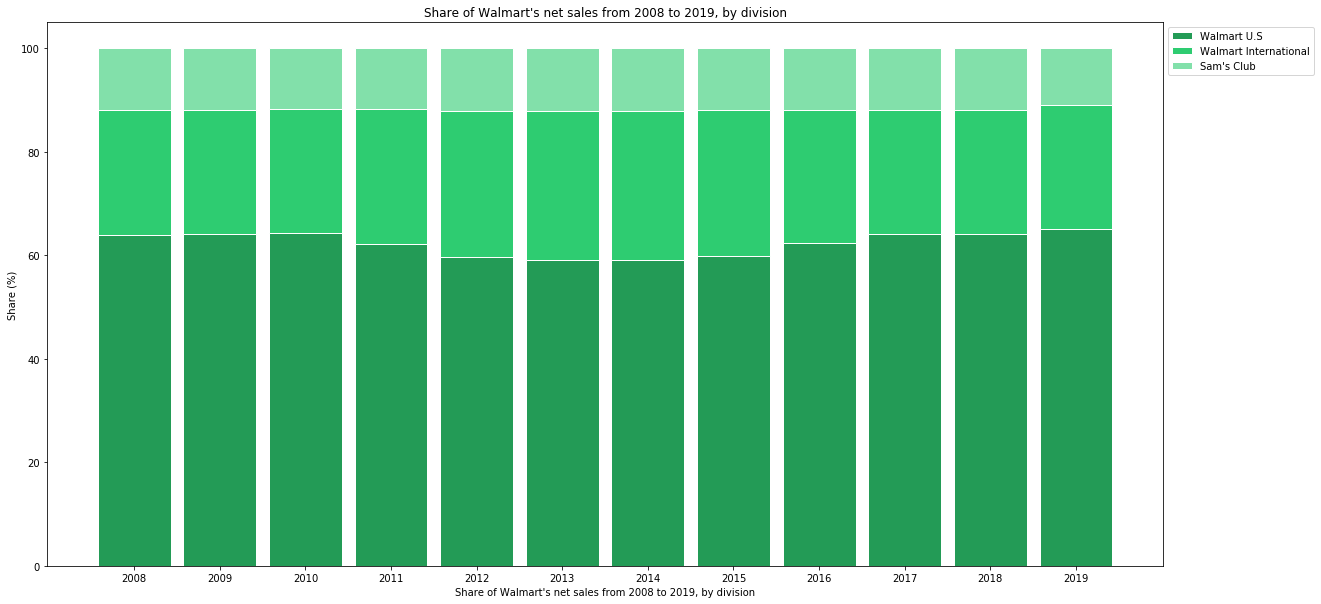

In [309]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
r = [0,1,2,3,4,5,6,7,8,9,10,11]
raw_data = {'greenBars': [63.9, 64.0, 64.2, 62.1, 59.6, 59.0, 59.0, 59.8, 62.3, 64.0, 64.0, 65.0], 'orangeBars': [24.2, 24.0, 24.0, 26.1, 28.3,  28.9, 28.9, 28.2, 25.8, 24.1, 24.0, 24.0],'blueBars': [11.9, 12.0, 11.8, 11.8, 12.1, 12.1, 12.1, 12.0, 11.9, 11.9, 12.0, 11.0]}
df = pd.DataFrame(raw_data)
 
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
 
barWidth = 0.85
names = ('2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019')

plt.bar(r, greenBars, color='#239B56', edgecolor='white', width=barWidth, label="Walmart U.S")
plt.bar(r, orangeBars, bottom=greenBars, color='#2ECC71', edgecolor='white', width=barWidth, label="Walmart International")
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#82E0AA', edgecolor='white', width=barWidth, label="Sam's Club")
 
plt.xticks(r, names)
plt.xlabel("Share of Walmart's net sales from 2008 to 2019, by division")
 
plt.ylabel('Share (%)')

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
plt.title("Share of Walmart's net sales from 2008 to 2019, by division")
plt.show()
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABSkAAAJcCAYAAAAVRyHvAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nOzdeZifVX03/veZDNlZk7BnYQkEAqY+RBTkcS0+RGmL2w9Q3B7AWqtcCKVqtWpptdriRnlUBBdcQBS3AiouWFARJYhsybAIEiABwhaSEJJMcn5/fL+DY5jMTEImd0her+uaa+Z7r5/7fO+ZZN5zzrlLrTUAAAAAAE3paLoAAAAAAGDLJqQEAAAAABolpAQAAAAAGiWkBAAAAAAaJaQEAAAAABolpAQAAAAAGiWkBOAZqZTy5lLKL5uuoy+llJ1KKVeWUhaXUj4+xOd6USnlnqE8x5aklPLHUspfbuBj7ltKua59P5y0IY9N80opXy6l/NsQHft/SikntL9+fSnlx4Pc7+ZSyosG2GZSKWVJKWXYBigVAOBpE1ICsMkqpRxWSrmqlLKolPJwKeVXpZTnNF3XILw1yYNJtqm1ntp7RSnlkFLKY72DgVLKOWtZ9rmNV/Lg9BXItIO9KRuxhk02oF6Lf0zyP7XWrWutZ27sk5dSziil3NYOSbtKKW9cY/1flFKuLaU83v78F73WlVLKx0opD7U//qOUUnqtf0kp5Xft+/eOUspb+6njQ6WUrz2N6zitlHJT+zruLKWctsb6KaWUn7evo6t32FxKOaCUclkp5cFSSu3j2PuVUi5v/6y5vZTyyvWtc6jUWr9ea33ZILedXmv9nwG2mVdrHVtrXbVBCgQAeJqElABskkop2yS5JMl/JdkhyW5J/iXJ8iE4V+cGPuTkJHNqrU8JQ5LMTjIsyf/qtex/J5m/xrIXJLlyA9f1tOhxtd4mJ7l5bSs3QrsuTfJXSbZN8qYkny6lHNo+9/Ak30/ytSTbJzkvyffby5NW4H5UkhlJnpXkyCR/2953qyTfTXJ2+9hHJ/lEKWXGEF1HSfLGdp1HJHlHKeWYXusvSHJdknFJ3pfkolLKhPa6lUm+meT4pxy09f3//bR+3uyQ1jV/rZSyzxBdBwAAfRBSArCp2idJaq0X1FpX1VqX1Vp/XGu9ofdG7V5ij7R7Vs3qtfwtpZS57V5Xd5RS/rbXuheVUu4ppby7lHJfki+1lx9ZSvl9KeXRdg/OZ62tuFLKoaWUa9o9r67pFfp8Oa0g6B/bQyn/bOhwrXVlkqvTCiFTStkxyfAkF66xbJ+0Q8r+rqWPuv7Y7nF2QyllaSnlC6U1/PyH7f1/WkrZvtf23yql3Ne+jitLKdN7rftyKeWzpZQflFKWphXwvL7XtV3cx/lfXkqZ0z7XvaWUf1hLnW8upfyyn/dv23btC9rH+bdSyrBSyn5JPpfkkHYNj/Zz/Dt69bp7fXv5Xu0ecw+1e9V9vZSy3VqO0VFKeU8p5Q/t7b9ZStmhvW5kKeVr7eWPtu+Bnfo4xuVJXpzkrHa9+/TRri9uX+9XSikLSyl3lVLeX0rp6HUtvyqlfLJ9rjva99+bSyl3l1IeKKW8qa9rSJJa6wdrrV211tW11t8k+UWSQ9qrX5SkM8mnaq3L2z09S5KXtNe/KcnHa6331FrvTfLxJG9ur9shyTZJvlpbrkkyN8n+fbTDEUn+KcnR7Xa4vr1811LKf5dWT+nbSykn9nMd/1Fr/V2ttbvWektaweLz28fZJ62Q/4PtnxXfTnJjkle3972l1vqF9B0WT0uya5JPtn/WXJ7kV0nesLZa+jC+lPKT9v12RSllcruu/1fWmPKhlHJxKeXkvg5SSjm8tHqBLiqlnJXWe9Gz7skexKWUz5VSzlhj3++XUk5pf/3ktAWllINLKbNLq7fr/aWUT7SXTyml1NL+I01/70Vp9YL9ZvseXVxaw8lnrkP7AAAMSEgJwKbq1iSrSinnlVJmlV7BWi/PTXJLkvFJ/iPJF0p5cijqA2n1+tomyVuSfLKU0run4s5phSyTk7y1ve6LafUSG5dW77D/LqWMWPOk7aDq0iRntrf9RJJLSynjaq1vTvL1JP/RHkr50z7qvjLtQLL9+Zftj97L7qy19sw1OdC1rOnVSQ5PK+j8qyQ/TCsgGp/Wv/2950X8YZKpSXZM8rt27b29LsmHk2yd5CtrXNtfJUmtdUqt9Y/t7b+Q5G9rrVsnOSDJ5f3U2d/7d16S7iR7J3l2kpclOaHWOjfJ25L8ul3DUwLGUsqYtN6bWe06Dk3y+57VSf49rVBqvyQTk3xoLfWdlFYvwhe2t38kyf9rr3tTWr0HJ6Z1D7wtybI1D1BrfUlaoeA72vXe2l7Vu11/mVaP4W2T7Nk+3xvTeq97t9UN7XOdn+QbSZ7Tbp/j0gpBx67lOnq3zaj2fj1h3fQkN6zR6/eG9vKe9df3Wnd9z7pa6/1p9V58SztAPiSt76enDMWvtf4oyUeSXNhuh57elhckuSet9n1Nko+UUl46iOsoafVA7n0dd9RaF/dV60CHW8uyAwaxb4/XJ/nXtO7l3+dP30fnJTm2V+A8PslL07ruPz9ha923k7y/fZw/pB3C9uH8tALf0t53+7S+R77Rx7afTvLpWus2SfZKq0dpXwZ6L/66ffztkvx3krPWchwAgPUipARgk1RrfSzJYUlqknOSLGz38undW+2uWus57TnVzkuyS5Kd2vtfWmv9Q7uH1xVJfpxWqNFjdVq9rpbXWpclOTHJ2bXW37R7U52X1tDy5/VR3iuS3FZr/Wq7V9cFSbrSCgQH44okh/UKWn6R5NdJntdr2RW92mKga1nTf9Va72/3fPtFkt/UWq+rtS5Pa3jus3sd+4u11sXtdR9KMqOUsm2vY32/1vqrdi+8JwZxbSuT7F9K2abW+kit9Xf9bNvn+9d+j2clObnWurTW+kCSTyY5pp9jrWl1kgNKKaNqrQtqrTe3r/f2WutP2u/7wrQC5heu5Rh/m+R97V6EPe3zmnbPs5VpBYZ7t++Xa9v37GA92a7tYx2d5L3t9+KPafVY7N2T785a65fabXVhWuHo6e3r+HGSFWkFlgP5XFrh3WXt12OTLFpjm0Vphad9rV+UZGyvMPmCJB9I63vlF2m1192DqCOllIlpfY+/u9b6RK3190nOzeB6MH4orf/HfmmQ19GfrrT+EHBaKWWrUsrL0ronRg9i3x6X1lqvbN8n70urp+/EWutv23X0hH3HpDU/6f19HOPlaU0TcVG7x/Wnkty3lvP9Iq2fjT0/B16TVnA/v49tVybZu5Qyvta6pNZ69ZobDPK9+GWt9Qfte/CraU0BAACwwQgpAdhk1Vrn1lrfXGvdPa1eTbum9Yt7j/t6bft4+8uxSdLufXl1e+jio2kFAON77btwjdBtcpJT28NpH23vM7F9zjXtmuSuNZbdlda8mYNxdbvOA9LqNfmLWuuSJHf3WvbkfJSDuJY19Q5AlvXxuqeNhpVSPlpaw5kfS/LH9ja9jz2owKmXV7fru6s97PWQfrZd2/s3OclWSRb0ei/OTqu354BqrUvTCv3e1j7GpaWUaUlrKH0p5RulNYT8sbTmYlxbW05O8t1eNcxNsiqtIPyraQV93yilzC+tB8psNZj62nq36/i0hvz3vqfWvJ/WfA+zRtD15Pu6NqWU/0zr/vr/evWcXJJWD93etkmyeC3rt0mypNZa2216YVq9Poen1WvxH0spr+ivjl52TfLwGr0fB/w+KqW8o33OV7RDwcFcx1q1A8Gj0vrjw31JTk2rt+E9/e23hiffz/b38sP508+O89Lq7Zr256+u5Ri7rnGcmrV8/7XXfSPJse1Fr8tTe0H3OD6tXtVdpTUtwZFrOfdA70XvwPTxJCPLhp/PFwDYggkpAXhGqLV2JflyBjEEsz1E+9tJzkiyU3tI8A/y58M613yozd1JPlxr3a7Xx+h2L8k1zU8rwOptUpJ7B3ktTyS5Jq0h3Lu0ry1p9Y46Mq0HlPTMRzmYa1lfr0vyN0n+Mq2hxlPay/trp74eBvSnlbVeU2v9m7QCxe9l7UNL+3N3Wj3zxvd6L7aptfYM3e23hnYdl9VaD0+rd2ZXWr1xk9ZQ75rkWe3hr8dl7W15d1pDxnvfEyNrrffWWlfWWv+l1rp/WsPJj0wrOBus3tfwYFq93XrfU4O+nwajlPIvafVOfdkaPT5vTvKsXj0jk9b9d3Ov9b17zM3ote6AJLe023p1bc0TeWn7PH1Z832bn2SHUkrv3o79Xncp5f8meU+Sl9Y/TYfQU+eeaxyrd639qrXeUGt9Ya11XK31/6Q17P63g9m3bWKvGsemNZVET6/GryX5m9J6oNB+aX1f9GXBGscpvV/34YK0evZOTms6gG/3tVGt9bZa67FpfU9+LK0HCo1ZY7N1fi8AADY0ISUAm6RSyrRSyqmllN3bryem1WvoKUMV+zA8yYgkC5N0l9YDWV42wD7nJHlbKeW5pWVMKeUVa/zS3uMHSfYppbyulNJZSjk6rYeFXDLIy0taIeTJSa7qteyX7WX31Vr/8DSuZbC2TisMfCitoa0fGcQ+96cV4DxFKWV4KeX1pZRt273THkur5+E6qbUuSGtI+8dLKduU1gNs9iql9AzLvj/J7uVPT6Bes46dSil/3Q5ilqfVy66njq3brx8tpeyW5LR+Svlckg+XPz0EZUIp5W/aX7+4lHJgaT2Z+7G0QsZ1vtb29a5KK8z9cCll6/b5Tkkr3HraSinvTSuQPrzW+tAaq/8nrbpPKqWMaPdSTP40l+hXkpxSStmtlLJrWr0Mv9xed12SqaWUl7S/Z/ZKK6ztPYdlb/cnmVLa8zO2h4VfleTfS+tBRM9Kq9dfnz0CS+vhRx9pX8cdvdfV1lyfv0/ywfaxXplW2Prt9r6llDIyre+nngcfjeh17Ge1l40urYc97dLrOlNaD5h50VquK0leXko5rH1P/mtaUyzc3a7tnrT+KPHVJN+urekl+nJpkumllFe1eyielNbcuX2qtV6X1s+Fc5NcVmtd20OkjiulTGhPLdCzzZ/dq+v6XgAADAUhJQCbqsVp9Q76TWk9AfnqJDelFZL0qz1k8aS0gp9H0gpo/nuAfWanNS/lWe19bs+fnmK85rYPpRXGnJpWwPePSY6stT44iOvqcUVaPZt6P2Tkl+1lTw71Xp9rWQdfSWtI571J5mRwAfAX0ppz8tFSSl89wt6Q5I/todRvy5+Gua6rniHEc9K67ovSCo6SVoB2c5L7Sil9tXlHWu/N/LSG3b4wydvb6/4lradAL0orFPpOPzV8Oq22/nEpZXFa7fPc9rqd2zU9ltYw8Cvy9ELFdyZZmuSOtO6D89N6kNOG8JG0esXdVlpP1l5SSvmnJKm1rkhrqPMb0wqw/m+So9rLk9Yw+4vTelL2TWm12dntff/Q3v7MtNrhirRCwS+spY5vtT8/VErpmav02LR68M5Pa77UD9Zaf7KW/f8trXlAr+l1HZ/rtf6YJDPTul8+muQ17XlHk1Yv1WX5U8/KZWk9tKnHG9LqyfhAWvNHHt4zlLz9h5Il7TZYm/OTfDCt++2gtB6k09t5SQ7M2od6p/3z47Xt2h9K64FWv+rnnEmrN+Vfts+/NkckubmUsiSte/qY2vf8suvyXgAAbHCl1gFHTAEAwBaplHJckum11vc+jWO8IK0Qe0q7RyMAAGsQUgIAwBBpP1DpG0mur7We3nQ9AACbKsO9AQBgCJRS9ktrGP0uST7VcDkAAJs0PSkBAAAAgEbpSQkAAAAANKqz6QKejvHjx9cpU6Y0XQYAAADAZuPaa699sNY6oek62LI8o0PKKVOmZPbs2U2XAQAAALDZKKXc1XQNbHkM9wYAAAAAGiWkBAAAAAAaJaQEAAAAABr1jJ6TEgAAAIChd+211+7Y2dl5bpIDotMb6251kpu6u7tPOOiggx7oawMhJQAAAAD96uzsPHfnnXfeb8KECY90dHTUpuvhmWX16tVl4cKF+993333nJvnrvraRfAMAAAAwkAMmTJjwmICS9dHR0VEnTJiwKK2euH1vsxHrAQAAAOCZqUNAydPRvn/WmkUKKQEAAACARgkpAQAAAFgnT3SvmJHkoA310T7eWh1//PETTz/99B17Xh922GFTjz766Mk9r0888cTdP/ShD+3U3zFGjx797HW8zEG56qqrRl144YXb9rXuzDPPHPfGN75xUu9lBx988L5XXnnl6DW3/dnPfjbmWc961rRp06btv+eee04/5ZRTdh2KejdVHpwDAAAAwDoZ2Tm8c+9zj95gx7v9hAv7zaie//znL7nooou2T/LAqlWr8sgjj3QuWbJkWM/6a665Zuyxxx579wYraJBWrlyZ2bNnj549e/aYo48+etHTOdbxxx+/xwUXXPCHQw45ZFl3d3euv/76kRuqzmcCPSkBAAAA2KS95CUvWXLttdeOTZJrr7121L777rtszJgxqxYuXDhs2bJl5Q9/+MPIQw899PFFixZ1HHLIIfvsv//+++2zzz77f+1rX9tuzWNdcsklWz/nOc/Z9+Uvf/meU6ZMOeDtb3/7bp/97Gd3OPDAA/fbZ5999r/55ptHJMn555+/7bOe9axp++233/6HHnroPnfffXdnkpxyyim7HnvssZOf//znT33Vq161x7//+7/vevHFF28/bdq0/c8555zt1/caH3744c5JkyatTJLOzs4cdNBBT6zvsZ6J9KQEAAAAYJM2ZcqUlZ2dnfW2224bfsUVV4x53vOet/Tee+/d6vLLLx+7/fbbd++7777LRo4cWYcNG1YvvfTS23fYYYfVCxYs6Hzuc5877XWve92jHR1/3k+vq6tr1EUXXXTHjjvu2D158uQDR4wY8eCNN94491//9V93/PjHP77jF7/4xbsPP/zwJcccc0xXR0dHPvGJT4w//fTTdz7nnHPuSZIbbrhh9G9+85uusWPH1jPPPHPc7Nmzx3zlK1+Z93Su8a1vfev9++233wHPfe5zF7/sZS9b9Pd///cPjR49eot5WJGQEgAAAIBN3kEHHbTk5z//+Zhf//rXY0877bT7582bN/xXv/rVmG233XbVwQcfvCRJVq9eXU4++eTdr7766rEdHR154IEHht9zzz2dkyZN6u59rAMPPHDp5MmTVybJpEmTls+aNWtRksyYMWPZFVdcsXWS3HnnncOPOuqo3RcuXLjVihUrOiZOnLi8Z/8jjjji0bFjxw4YIJZSBr38jDPOWPCWt7zl4UsuuWSbb37zm+O+9a1vjfvtb397y+Bb6JnNcG8AAAAANnmHHHLIkquuumpsV1fXqOc85znLXvSiFy255pprxl599dVjDzvssCVJcvbZZ+/w0EMPdd54441zu7q65owbN27lsmXLnpJ/jRgx4smAsaOjIyNHjqw9X69ataokyTve8Y5Jb3/72x+49dZb55x11ll3LV++/MnjjBkzZvVgah4/fnz3o48+Oqz3skcffXTYTjvt1N3X9tOnT1/+7ne/e+FVV111S1dX16j77rtvWF/bbY6ElAAAAABs8l74whcu+elPf7rddtttt6qzszM77bTTqscee2zYddddN/bFL37x0iRZtGjRsPHjx68cMWJEvfjii7eeP3/+8PU93+LFi4f1zBH55S9/edzatttmm21WLVmypM+M7bDDDlt67bXXjp03b15nklx55ZWjV6xY0bHXXnutWHPbb3zjG9uuXt3KPm+88caRw4YNq+PHj1+1vvU/0xjuDQAAAMA6eaJ7RfdAT+Re1+ON7Ow/Tzz44IOXPfroo52vetWrHupZNm3atGVLly4dtssuu3QnyQknnPDwrFmz9j7ggAP2mz59+uN77LHHej985n3ve9/8Y489dq+ddtppxcyZM5fOmzdvRF/bzZo1a/EZZ5yxy7Rp0/Y/9dRTF5x44omP9KybOHFi98c+9rG7jzjiiKmrV68uY8aMWfW1r33tjmHDWh0kjz766Ml///d/v/AFL3jB41/72tfGvec975k4cuTI1Z2dnfXcc8+9s7Nzy4nuSq3P3Pk3Z86cWWfPnt10GQAAAACbjVLKtbXWmb2XXX/99X+cMWPGg03VxObh+uuvHz9jxowpfa0z3BsAAAAAaJSQEgAAAABolJASAAAAAGiUkBIAAAAAaNSQhZSllC+WUh4opdzUa9kOpZSflFJua3/evr28lFLOLKXcXkq5oZTyv4aqLgAAAABg0zKUPSm/nOSINZa9J8nPaq1Tk/ys/TpJZiWZ2v54a5LPDmFdAAAAAMAmZMhCylrrlUkeXmPx3yQ5r/31eUmO6rX8K7Xl6iTblVJ2GaraAAAAAFh/y1evnJHkoA310T7eWh1//PETTz/99B17Xh922GFTjz766Mk9r0888cTdP/ShD+3U3zFGjx797HW8zEG56qqrRl144YXb9rXukksu2frFL37x3v3t/+CDDw776Ec/OmEoauurnp/85Cdjel7/x3/8x4Szzjpr3IY8xy233DJ86tSp09d1v84NWcQg7FRrXZAktdYFpZSem2u3JHf32u6e9rIFax6glPLWtHpbZtKkSUNb7UbUXVelswxruoxN2rq2kTYd2Pq0kXYdmHbd8LTp0NCuQ8O/Vxuee3VoaNeh4WfAhudeHRradcPb0tpnRMdWnTOuPWWDHe/6gz7Rb0b1/Oc/f8lFF120fZIHVq1alUceeaRzyZIlTzb4NddcM/bYY4+9u59DDImVK1dm9uzZo2fPnj3m6KOPXrQ+x3jooYeGfeELX9jxPe95z8LB7rN69erUWjNs2Lrdc5dffvnWY8eOXXX44YcvTZJ//Md/HPQ5h9rGDinXpvSxrPa1Ya3180k+nyQzZ87sc5tnos4yLP9617eaLmOT9s+TX7tO22vTga1rmybadTC064anTYeGdh0a/r3a8NyrQ0O7Dg0/AzY89+rQ0K4b3vq0KYP3kpe8ZMl73/veiUly7bXXjtp3332X3X///VstXLhw2NixY1f/4Q9/GHnooYc+vmjRoo4jjjhi70WLFg3r7u4uH/jAB+Yfd9xxj/Y+1iWXXLL1v/zLv+w6YcKElXPmzBn98pe//JEDDzxw2Wc+85mdli9fXr773e/+Yfr06cvPP//8bT/60Y/usnLlyo7tt9+++8ILL7xj4sSJ3aeccsquCxYs2GrevHnDd9hhh+7Zs2ePfeKJJzqmTZs29tRTT11w4oknPtLXNZxyyim73n333cPvuuuuEfPnzx/+tre97f73v//9D5x66qm733333SOmTZu2/wtf+MLHzj777Hv++Z//eafvfve7O6xYsaK84hWvePSTn/zk/FtuuWX4rFmzph566KGLr7322rHf//73b/+Lv/iL6ccff/wDP/7xj7cdOXLk6ksuueT2iRMndvdV++OPP97xla98ZUJHR0f95je/Oe5Tn/rUvB//+MfbjB07dtXpp59+/1VXXTXq7/7u7yYvW7asY/LkycvPP//8P06YMGHVwQcfvO9BBx205Je//OU2ixcvHva5z33uj0ccccSSW265ZfjrXve6PZYtW9aRJJ/+9Kfn9YSf62NjP937/p5h3O3PD7SX35NkYq/tdk8yfyPXBgAAAMAmaMqUKSs7OzvrbbfdNvyKK64Y87znPW/pzJkzl15++eVjf/GLX4zed999l40cObKOHj169aWXXnr7nDlz5l5xxRW3/tM//dPuq1evfsrxurq6Rn32s5+9e+7cuTdfdNFF42699daRN95449w3vOEND3784x/fMUkOP/zwJb///e+75s6dO+c1r3nNw6effvrOPfvfcMMNoy+77LLbL7744jvf+973zv+rv/qrR7q6uuasLaDscfvtt4+84oorbr3mmmvmnnHGGbsuX768fPzjH79n4sSJy7u6uuacffbZ93znO9/Z5vbbbx95ww03zJ07d+6c3//+96N/+MMfjk2SP/7xjyPf8pa3PDR37tw5++yzz4ply5Z1HHLIIUtuueWWOYcccsiS//qv/5qwttr33XffFW984xsXvu1tb7u/q6trzhFHHLGkd21vfvOb9/jIRz5yz6233jpn+vTpy9797nfv2rOuu7u73HjjjXM/9rGP3X366afvmiS77rpr9y9+8Ytb58yZM/fCCy+8413vetfTGvK8sXtS/neSNyX5aPvz93stf0cp5RtJnptkUc+wcAAAAAA46KCDlvz85z8f8+tf/3rsaaeddv+8efOG/+pXvxqz7bbbrjr44IOXJMnq1avLySefvPvVV189tqOjIw888MDwe+65p3PSpEndvY914IEHLp08efLKJJk0adLyWbNmLUqSGTNmLLviiiu2TpI777xz+FFHHbX7woULt1qxYkXHxIkTl/fsf8QRRzw6duzYdR7h+7KXvezRUaNG1VGjRnXvsMMOK++5556nZHM/+tGPtrnyyiu32X///fdPkscff7yjq6tr5J577rlil112WfHSl770yd6KW221VT3mmGMWtdtn6U9/+tNtBqq9Lw899NCwxYsXD3vFK16xJElOPPHEh1772tfu2bP+ta997SNJcuihhy497bTThifJihUryvHHHz95zpw5ozo6OnLXXXeNWNf26G3IelKWUi5I8usk+5ZS7imlHJ9WOHl4KeW2JIe3XyfJD5LckeT2JOckeftQ1QUAAADAM88hhxyy5Kqrrhrb1dU16jnPec6yF73oRUuuueaasVdfffXYww47bEmSnH322Ts89NBDnTfeeOPcrq6uOePGjVvZMxy5txEjRjwZMHZ0dGTkyJG15+tVq1aVJHnHO94x6e1vf/sDt95665yzzjrrruXLlz95nDFjxjy1e+Yg9D7vsGHD0t3d/ZQpEGutOfnkkxd0dXXN6erqmjNv3ryb3vWudz2YJKNHj/6z83Z2dtaOjo6er588Xn+1r4+e9uns7HyyfT784Q/vtOOOO66cO3funBtvvHHOypUrn9Y5hvLp3sfWWneptW5Va9291vqFWutDtdaX1lqntj8/3N621lr/vta6V631wFrr7KGqCwAAAIBnnhe+8IVLfvrTn2633Xbbrers7MxOO+206rHHHht23XXXjX3xi5iuqNAAACAASURBVF+8NEkWLVo0bPz48StHjBhRL7744q3nz58/fH3Pt3jx4mGTJk1amSRf/vKX1/oE7G222WbVkiVL1jtj23bbbVctXbr0yf1nzZr12Fe/+tXxixYt6kiSO++8c6t77713nUZDr632rbfeetXixYuf8rSdcePGrdpmm21W/ehHPxqbJF/4whfGHXLIIUvW3K63RYsWDdtll11WDhs2LJ/5zGfGrVq1al1KfIpN5cE5AAAAADxDLF+9snugJ3Kv6/FGdGzV7zYHH3zwskcffbTzVa961UM9y6ZNm7Zs6dKlw3bZZZfuJDnhhBMenjVr1t4HHHDAftOnT398jz32eGJ9a3rf+943/9hjj91rp512WjFz5syl8+bN63M486xZsxafccYZu0ybNm3//h6cszY777zzqoMOOmjJ1KlTp7/kJS9ZdPbZZ99z8803j3zOc54zLWn1nvz6179+Z2dn56CHl6+t9le/+tWPvuY1r9nrhz/84Xaf+tSn5vXe50tf+tKdf/d3fzf5pJNO6pg0adLyCy644I/9nePkk09+4NWvfvVe3/ve97Y/7LDDFo8aNWq9epf2KLU+cx+QPXPmzDp79ubT6dJT0vq3Pk9K06b9W9+nz2nX/mnXDU+bDg3tOjT8e7XhuVeHhnYdGn4GbHju1aGhXTe8zenp3qWUa2utM3svu/766/84Y8aMB5uqic3D9ddfP37GjBlT+lq3sZ/uDQAAAADwZ4SUAAAAAECjhJQAAAAAQKOElAAAAABAo4SUAAAAAECjhJQAAAAAQKOElAAAAACsk+7Vq2YkOWhDfbSP1693v/vdO++9997T99lnn/2nTZu2/+WXXz5mQ1zLbrvtduBgt12+fHl5+9vfvtvkyZMPmDp16vQDDzxwv29+85vb9BxnwYIFnf3tf/DBB+975ZVXjn66NW+O+m04AAAAAFhTZ8ewzn+961sb7Hj/PPm1/WZUP/3pT8dcdtll2914441zRo0aVRcsWNC5fPnyssEKGKR3vetdu953331bdXV13Txq1Kh69913d1522WVbb+w6Nkd6UgIAAACwSbv33nu32mGHHbpHjRpVk2SXXXbpnjJlysok+Yd/+IddDjjggP2mTp06/dhjj528evXqJK1ei8cff/zEmTNn7rvnnntOv+KKK0a/7GUv22vy5MkHnHTSSbv2HHv77bfvTpK77rprq5kzZ+47bdq0/adOnTr9Rz/60djeNSxevLjj/PPPn3DuuefO66lj4sSJ3SeccMIjvbe75ZZbhk+dOnV6z+sPfOADO51yyilPnu/LX/7yuGc/+9nTpk6dOv3nP/+5XpVtQkoAAAAANmlHHXXUY/Pnzx8+ZcqUA4477rhJl1566ZMB4mmnnfbATTfdNPe22267edmyZR3f+MY3tu1ZN3z48NWzZ8++5S1vecvC1772tXufc84587q6um6+8MILx993333DkuSmm26amyRf/OIXd3jpS1+6qKura87cuXNvfu5zn/t47xrmzJkzYpdddlmxww47rH461/L44493XHfddV1nnnnmXW9961v3eDrH2pwIKQEAAADYpG277barb7rppjlnnXXWXRMmTOh+05vetNeZZ545Lkl++MMfbv2sZz1r2j777LP/VVddtfVNN900qme/V77ylY8myYwZM5btvffeyyZPnrxy1KhRdeLEicvvuOOO4b3P8bznPW/pBRdcMP6UU07Z9be//e2o7bff/mmFkWvzute97uEkmTVr1pIlS5Z0PPjgg8OG4jzPNEJKAAAAADZ5nZ2dOfLIIxd/8pOfnP+f//mf8773ve9t//jjj5dTTz118ne+850/3HrrrXOOO+64B5944okn866RI0fWJOno6MiIESNqz/KOjo50d3f/2ZyWs2bNWnLllVfesttuu61485vfvMdZZ501rvf6/ffff/mCBQuGP/LII/3maZ2dnbVnyHmS9K4nSUr586k013y9pRJSAgAAALBJu/7660fceOONI3peX3fddaN23333FY8//nhHkuy8887dixYt6rj44ou3X99z3HrrrcN32223laeeeuqDxx133IO/+93v/my+yK233nr1Mccc8+CJJ5446YknnihJax7Lz3zmMzv03m733Xfvfvjhhzvvu+++YcuWLSuXXXbZtr3XX3DBBdsnyWWXXTZ26623XjVu3LhV61vz5sTTvQEAAABYJ92rV3UP9ETudT1eZ8faRz0/9thjw0466aRJjz322LBhw4bVKVOmLD/vvPPuGj9+/KrXv/71C/fff//pu++++4oZM2YsXd8aLrvssq3PPPPMnTs7O+vo0aNXff3rX79zzW0+9alP3XvyySfvts8++0wfMWJEHTVq1KoPfvCD83tvM2LEiHrqqacuOPjgg/fbfffdl++9995P9F6//fbbr3r2s589bcmSJcM+//nPP+UcWyohJQAAAADrpLNj2PUb+Hj9rv/f//t/P37dddd19bXuzDPPnH/mmWfOX3P5b3/721t6vj7yyCMXH3nkkYv7Wtfjne9850PvfOc7H+qvjpEjR9bPfe5z9yS5Z81199577409X7///e9/4P3vf/8D/dXEnzPcGwAAAABolJASAAAAAGiUkBIAAACAgaxevXq1x1Cz3tr3z+q1rRdSAgAAADCQmxYuXLitoJL1sXr16rJw4cJtk9y0tm08OAcAAACAfnV3d59w3333nXvfffcdEJ3eWHerk9zU3d19wto2EFICAAAA0K+DDjrogSR/3XQdbL4k3wAAAABAo4SUAAAAAECjhJQAAAAAQKOElAAAAABAo4SUAAAAAECjhJQAAAAAQKOElAAAAABAo4SUAAAAAECjhJQAAAAAQKOElAAAAABAo4SUAAAAAECjhJQAAAAAQKOElAAAAABAo4SUAAAAAECjhJQAAAAAQKOElAAAAABAo4SUAAAAAECjhJQAAAAAQKOElAAAAABAo4SUAAAAAECjhJQAAAAAQKOElAAAAABAo4SUAAAAAECjhJQAAAAAQKOElAAAAABAo4SUAAAAAECjhJQAAAAAQKOElAAAAABAozqbLgAAAADY9K1c3Z1/nvzapsvYZK1c3Z2tOsQssL589wAAAAAD2qqjMzOuPaXpMjZZ1x/0iaZLgGc0w70BAAAAgEYJKQEAAACARhnuDawT89AMbH3motGu/TO/DwAAwObNb3ybCAHFwNY1pNCmA1uf4Mc8NANbn7lotGv/zO8DrCv/DxiYP6oNDf9n3fDcq0PDH4GBTY2fSJsIAcXA1jWk0KYDE/ywOfPLycD80jc0BBQbnj+qDQ1/VBsa/s+64blXh4bfBYBNjZASgM2SX04G5pe+oSGg2PD8Ig0AsPnz4BwAAAAAoFFCSgAAAACgUUJKAAAAAKBRQkoAAAAAoFFCSgAAAACgUUJKAAAAAKBRQkoAAAAAoFFCSgAAAACgUUJKAAAAAKBRQkoAAAAAoFFCSgAAAACgUUJKAAAAAKBRQkoAAAAAoFFCSgAAAACgUUJKAAAAAKBRQkoAAAAAoFFCSgAAAACgUUJKAAAAAKBRQkoAAAAAoFFCSgAAAACgUUJKAAAAAKBRQkoAAAAAoFFCSgAAAACgUUJKAAAAAKBRQkoAAAAAoFFCSgAAAACgUUJKAAAAAKBRQkoAAAAAoFFCSgAAAACgUUJKAAAAAKBRQkoAAAAAoFFCSgAAAACgUUJKAAAAAKBRQkoAAAAAoFFCSgAAAACgUUJKAAAAAKBRjYSUpZR3lVJuLqXcVEq5oJQyspSyRynlN6WU20opF5ZShjdRGwAAAACwcW30kLKUsluSk5LMrLUekGRYkmOSfCzJJ2utU5M8kuT4jV0bAAAAALDxNTXcuzPJqFJKZ5LRSRYkeUmSi9rrz0tyVEO1AQAAAAAb0UYPKWut9yY5I8m8tMLJRUmuTfJorbW7vdk9SXbra/9SyltLKbNLKbMXLly4MUoGAAAAAIZQE8O9t0/yN0n2SLJrkjFJZvWxae1r/1rr52utM2utMydMmDB0hQIAAAAAG0UTw73/MsmdtdaFtdaVSb6T5NAk27WHfyfJ7knmN1AbAAAAALCRNRFSzkvyvFLK6FJKSfLSJHOS/DzJa9rbvCnJ9xuoDQAAAADYyJqYk/I3aT0g53dJbmzX8Pkk705ySinl9iTjknxhY9cGAAAAAGx8nQNvsuHVWj+Y5INrLL4jycENlAMAAAAANKiJ4d4AAAAAAE8SUgIAAAAAjRJSAgAAAACNElICAAAAAI0SUgIAAAAAjRJSAgAAAACNElICAAAAAI0SUgIAAAAAjRJSAgAAAACNElICAAAAAI0SUgIAAAAAjRJSAgAAAACNElICAAAAAI0SUgIAAAAAjRJSAgAAAACNElICAAAAAI0SUgIAAAAAjRJSAgAAAACNElICAAAAAI0SUgIAAAAAjRJSAgAAAACNElICAAAAAI0SUgIAAAAAjRJSAgAAAACNElICAAAAAI0SUgIAAAAAjRJSAgAAAACNElICAAAAAI0SUgIAAAAAjRJSAgAAAACNElICAAAAAI0SUgIAAAAAjRJSAgAAAACNElICAAAAAI0SUgIAAAAAjRJSAgAAAACNElICAAAAAI0SUgIAAAAAjRJSAgAAAACNElICAAAAAI0SUgIAAAAAjRJSAgAAAACNElICAAAAAI0SUgIAAAAAjRJSAgAAAACNElICAAAAAI0SUgIAAAAAjRJSAgAAAACNElICAAAAAI0SUgIAAAAAjRJSAgAAAACNElICAAAAAI0SUgIAAAAAjRJSAgAAAACNElICAAAAAI0SUgIAAAAAjRJSAgAAAACNElICAAAAAI0SUgIAAAAAjRJSAgAAAACNElICAAAAAI0SUgIAAAAAjRJSAgAAAACNElICAAAAAI0SUgIAAAAAjRJSAgAAAACNElICAAAAAI0SUgIAAAAAjRJSAgAAAACNElICAAAAAI0SUgIAAAAAjepsugAAAABg0/fE6hW5/qBPNF3GJuuJ1SsysmN402XAM5aQEgAAABjQyI7h2fvco5suY5N1+wkXNl0CPKMZ7g0AAAAANEpICQAAAAA0ynBvYJ2Yh2Zg5qIBAACAdSOkZLMlTBvY+oRp5qEZmLloAIDB8n/Wga3P/1m168D8YR3Y1AgpNxH+ER3Yuv4jKkwbmDANAKBZ/s86sPX5P6t2HZjfBYBNjZByE+Ef0YH5RxQAAABg8+TBOQAAAABAo4SUAAAAAECjhJQAAAAAQKOElAAAAABAo4SUAAAAAECjhJQAAAAAQKM6my4AAAB4Znhi9Ypcf9Anmi5jk/bE6hUZ2TG86TIA4BlHSAmwCfBLX//8wgewaRjZMTx7n3t002Vs0m4/4cKmSwCAZyQhJcAmwC99/fMLHwAAwObNnJQAAAAAQKOElAAAAABAo4SUAAAAAECjhJQAAAAAQKOElAAAAABAo4SUAAAAAECjGgkpSynblVIuKqV0lVLmllIOKaXsUEr5SSnltvbn7ZuoDQAAAADYuJrqSfnpJD+qtU5LMiPJ3CTvSfKzWuvUJD9rvwYAAAAANnMbPaQspWyT5AVJvpAktdYVtdZHk/xNkvPam52X5KiNXRsAAAAAsPE10ZNyzyQLk3yplHJdKeXcUsqYJDvVWhckSfvzjn3tXEp5aylldill9sKFCzde1QAAAADAkOhs6Jz/K8k7a62/KaV8OuswtLvW+vkkn0+SmTNn1qEpEQCAZ7InVq/I9Qd9oukyNmlPrF6RkR3Dmy4DACBJMyHlPUnuqbX+pv36orRCyvtLKbvUWheUUnZJ8kADtQGwmRBQDExAweZsZMfw7H3u0U2XsUm7/YQLmy4BAOBJGz2krLXeV0q5u5Syb631liQvTTKn/fGmJB9tf/7+xq4NgM2HgGJgAgoAAGBT0URPyiR5Z5Kvl1KGJ7kjyVvSmh/zm6WU45PMS/LahmoDAAAAADaiRkLKWuvvk8zsY9VLN3YtAMDgGUY/sHUdRq9NB2ZqAgCAzV9TPSkBgGcgw+gHtq7D6LXpwExNAACw+etougAAAAAAYMsmpAQAAAAAGiWkBAAAAAAaJaQEAAAAABolpAQAAAAAGiWkBAAAAAAaJaQEAAAAABolpAQAAAAAGiWkBAAAAAAaJaQEAAAAABrVOZiNSik7Jnl+kl2TLEtyU5LZtdbVQ1gbAAAAALAF6DekLKW8OMl7kuyQ5LokDyQZmeSoJHuVUi5K8vFa62NDXSgAAAAAsHkaqCfly5OcWGudt+aKUkpnkiOTHJ7k20NQGwAAAACwBeg3pKy1ntbPuu4k39vgFQEAAAAAW5R1enBOKeV5pZTLSym/KqW8cqiKAgAAAAC2HAPNSblzrfW+XotOSfLXSUqSq5J8dwhrAwAAAAC2AAPNSfm5Usq1Sf6z1vpEkkeTvC7J6iQelgMAAAAAPG39DveutR6V5PdJLimlvCHJyWkFlKPTesI3AAAAAMDTMuCclLXWi5P8nyTbJflOkltqrWfWWhcOdXEAAAAAwOav35CylPLXpZRfJrk8yU1JjknyylLKBaWUvTZGgQAAAADA5m2gOSn/LckhSUYl+UGt9eAkp5RSpib5cFqhJQAAAADAehsopFyUVhA5KskDPQtrrbdFQAkAAAAAbAADzUn5yrQektOd1lO9AQAAAAA2qIF6Uj5Ra/2v/jYopYyttS7ZgDUBAAAAAFuQgXpSfr+U8vFSygtKKWN6FpZS9iylHF9KuSzJEUNbIgAAAACwOeu3J2Wt9aWllJcn+dskzy+lbJ/W0O9bklya5E211vuGvkwAAAAAYHM10HDv1Fp/kOQHG6EWAAAAAGALNNBwbwAAAACAISWkBAAAAAAaJaQEAAAAABo16JCylHJYKeUt7a8nlFL2GLqyAAAAAIAtxaBCylLKB5O8O8l724u2SvK1oSoKAAAAANhyDLYn5SuT/HWSpUlSa52fZOuhKgoAAAAA2HIMNqRcUWutSWqSlFLGDF1JAAAAAMCWZLAh5TdLKWcn2a6UcmKSnyY5Z+jKAgAAAAC2FJ2D2ajWekYp5fAkjyXZN8kHaq0/GdLKAAAAAIAtwoAhZSllWJLLaq1/mUQwCQAAAABsUAMO9661rkryeCll241QDwAAAACwhRnUcO8kTyS5sZTyk7Sf8J0ktdaThqQqAAAAAGCLMdiQ8tL2BwAAAADABjXYB+ecN9SFAAAAAABbpkGFlKWUqUn+Pcn+SUb2LK+17jlEdQEAAAAAW4gBH5zT9qUkn03SneTFSb6S5KtDVRQAAAAAsOUYbEg5qtb6sySl1npXrfVDSV4ydGUBAAAAAFuKQT/du5TSkeS2Uso7ktybZMehKwsAAAAA2FIMtiflyUlGJzkpyUFJ3pDkTUNVFAAAAACw5Rjs072vaX+5JMlbhq4cAAAAAGBLM9ine++T5LQkk3vvU2s1LyUAAAAA8LQMdk7KbyX5XJJzkqwaunIAAAAAgC3NYEPK7lrrZ4e0EgAAAABgi9RvSFlK2aH95cWllLcn+W6S5T3ra60PD2FtAAAAAMAWYKCelNcmqUlK+/VpvdbVJHsORVEAAAAAwJaj35Cy1rrHxioEAAAAANgydfS3spTynFLKzr1ev7GU8v1Sypm9hoIDAAAAAKy3fkPKJGcnWZEkpZQXJPlokq8kWZTk80NbGgAAAACwJRhoTsphvR6Oc3SSz9dav53k26WU3w9taQAAAADAlmCgnpTDSik9QeZLk1zea91AAScAAAAAwIAGChovSHJFKeXBJMuS/CJJSil7pzXkGwAAAADgaRno6d4fLqX8LMkuSX5ca63tVR1J3jnUxQEAAAAAm78Bh2zXWq/uY9mtQ1MOAAAAALClGWhOSgAAAACAISWkBAAAAAAaJaQEAAAAABolpAQAAAAAGiWkBAAAAAAaJaQEAAAAABr1/7d352G2XWWdgH+fCTEGCGOwIQkCTRqJCJcQQhgMEIZmkkGkAVGCImkUmklUcGgEtQWkURFReQgCLUKYlDAnxjAnNBkIBAINokIkkvAwi0YDX/+xd3kPlap7b7inatWl3vd56qlz9tl7n7W+s+vUqV+ttbeQEgAAAAAYSkgJAAAAAAwlpAQAAAAAhhJSAgAAAABDCSkBAAAAgKGElAAAAADAUEJKAAAAAGAoISUAAAAAMJSQEgAAAAAYSkgJAAAAAAwlpAQAAAAAhhJSAgAAAABDCSkBAAAAgKGElAAAAADAUEJKAAAAAGAoISUAAAAAMJSQEgAAAAAYSkgJAAAAAAwlpAQAAAAAhhJSAgAAAABDCSkBAAAAgKGElAAAAADAUEJKAAAAAGAoISUAAAAAMJSQEgAAAAAYSkgJAAAAAAwlpAQAAAAAhhJSAgAAAABDDQspq2q/qjqvqt48379xVX2gqj5ZVSdX1QGj2gYAAAAAbJ6RIymfmOTChfvPSfJ73X1Eki8lefSQVgEAAAAAm2pISFlVhyW5b5KXzPcryfFJXjev8vIkDxzRNgAAAABgc40aSfn7SX4pybfm+9dJ8uXuvny+f1GSQ9fasKpOrKqzq+rsSy+9dONbCgAAAABsqE0PKavqfkku6e5zFhevsWqvtX13v7i7j+7uow855JANaSMAAAAAsHn2H/Ccd0xy/6q6T5IDkxycaWTlNatq/3k05WFJPjegbQAAAADAJtv0kZTd/fTuPqy7b5TkYUn+prsfkeSMJD8+r3ZCkjdudtsAAAAAgM038ureq/1ykqdU1acynaPypMHtAQAAAAA2wYjp3v+hu9+Z5J3z7U8nOWZkewAAAACAzbeVRlICAAAAANuQkBIAAAAAGEpICQAAAAAMJaQEAAAAAIYSUgIAAAAAQwkpAQAAAIChhJQAAAAAwFBCSgAAAABgKCElAAAAADCUkBIAAAAAGEpICQAAAAAMJaQEAAAAAIYSUgIAAAAAQwkpAQAAAIChhJQAAAAAwFBCSgAAAABgKCElAAAAADCUkBIAAAAAGEpICQAAAAAMJaQEAAAAAIYSUgIAAAAAQwkpAQAAAIChhJQAAAAAwFBCSgAAAABgKCElAAAAADCUkBIAAAAAGEpICQAAAAAMJaQEAAAAAIYSUgIAAAAAQwkpAQAAAIChhJQAAAAAwFBCSgAAAABgKCElAAAAADCUkBIAAAAAGEpICQAAAAAMJaQEAAAAAIYSUgIAAAAAQwkpAQAAAIChhJQAAAAAwFBCSgAAAABgKCElAAAAADCUkBIAAAAAGEpICQAAAAAMJaQEAAAAAIYSUgIAAAAAQwkpAQAAAIChhJQAAAAAwFBCSgAAAABgKCElAAAAADCUkBIAAAAAGEpICQAAAAAMJaQEAAAAAIYSUgIAAAAAQwkpAQAAAIChhJQAAAAAwFBCSgAAAABgKCElAAAAADCUkBIAAAAAGEpICQAAAAAMJaQEAAAAAIYSUgIAAAAAQwkpAQAAAIChhJQAAAAAwFBCSgAAAABgKCElAAAAADCUkBIAAAAAGEpICQAAAAAMJaQEAAAAAIYSUgIAAAAAQwkpAQAAAIChhJQAAAAAwFBCSgAAAABgKCElAAAAADCUkBIAAAAAGEpICQAAAAAMJaQEAAAAAIYSUgIAAAAAQwkpAQAAAIChhJQAAAAAwFBCSgAAAABgKCElAAAAADCUkBIAAAAAGEpICQAAAAAMJaQEAAAAAIYSUgIAAAAAQwkpAQAAAIChhJQAAAAAwFBCSgAAAABgKCElAAAAADCUkBIAAAAAGEpICQAAAAAMJaQEAAAAAIYSUgIAAAAAQwkpAQAAAIChNj2krKrDq+qMqrqwqj5aVU+cl1+7qk6rqk/O36+12W0DAAAAADbfiJGUlyf5he6+eZJjkzyuqo5M8rQkp3f3EUlOn+8DAAAAAN/lNj2k7O6Lu/vc+fbXklyY5NAkD0jy8nm1lyd54Ga3DQAAAADYfEPPSVlVN0py6yQfSPL93X1xMgWZSa63zjYnVtXZVXX2pZdeullNBQAAAAA2yLCQsqquluT1SZ7U3V/d0+26+8XdfXR3H33IIYdsXAMBAAAAgE0xJKSsqqtkCihf2d1vmBd/vqquPz9+/SSXjGgbAAAAALC5Rlzdu5KclOTC7n7+wkOnJDlhvn1CkjdudtsAAAAAgM23/4DnvGOSn0rykar60LzsV5I8O8lrqurRST6T5CED2gYAAAAAbLJNDym7+71Jap2H77aZbQEAAAAAxht6dW8AAAAAACElAAAAADCUkBIAAAAAGEpICQAAAAAMJaQEAAAAAIYSUgIAAAAAQwkpAQAAAIChhJQAAAAAwFBCSgAAAABgKCElAAAAADCUkBIAAAAAGEpICQAAAAAMJaQEAAAAAIYSUgIAAAAAQwkpAQAAAIChhJQAAAAAwFBCSgAAAABgKCElAAAAADCUkBIAAAAAGEpICQAAAAAMJaQEAAAAAIYSUgIAAAAAQwkpAQAAAIChhJQAAAAAwFBCSgAAAABgKCElAAAAADCUkBIAAAAAGEpICQAAAAAMJaQEAAAAAIYSUgIAAAAAQwkpAQAAAIChhJQAAAAAwFBCSgAAAABgKCElAAAAADCUkBIAAAAAGEpICQAAAAAMJaQEAAAAAIYSUgIAAAAAQwkpAQAAAIChhJQAAAAAwFBCSgAAAABgKCElAAAAADCUkBIAAAAAGEpICQAAAAAMJaQEAAAAAIYSUgIAAAAAQwkpAQAAAIChhJQAAAAAwFBCSgAAAABgKCElAAAAADCUkBIAAAAAGEpICQAAAAAMJaQEAAAAAIYSUgIAAAAAQwkpAQAAAIChhJQAAAAAwFBCSgAAAABgKCElAAAAADCUkBIAAAAAGEpICQAAAAAMJaQEAAAAAIYSUgIAAAAAQwkpAQAAAIChhJQAAAAAwFBCSgAAAABgKCElAAAAADCUkBIAAAAAGEpICQAAAAAMJaQEAAAAAIYSoiV3hwAAFY9JREFUUgIAAAAAQwkpAQAAAIChhJQAAAAAwFBCSgAAAABgKCElAAAAADCUkBIAAAAAGEpICQAAAAAMJaQEAAAAAIYSUgIAAAAAQwkpAQAAAIChhJQAAAAAwFBCSgAAAABgKCElAAAAADCUkBIAAAAAGEpICQAAAAAMJaQEAAAAAIYSUgIAAAAAQwkpAQAAAIChhJQAAAAAwFBCSgAAAABgKCElAAAAADCUkBIAAAAAGEpICQAAAAAMJaQEAAAAAIYSUgIAAAAAQwkpAQAAAIChtlRIWVX3qqpPVNWnquppo9sDAAAAAGy8LRNSVtV+Sf4oyb2THJnk4VV15NhWAQAAAAAbbcuElEmOSfKp7v50d/9bklcnecDgNgEAAAAAG6y6e3QbkiRV9eNJ7tXdPzvf/6kkt+vux69a78QkJ853b5bkE5va0O3jukm+MLoR34XUdfnUdGOo68ZQ1+VT042hrsunphtDXTeGui6fmm4Mdd04P9Ddh4xuBNvL/qMbsKDWWHaFBLW7X5zkxRvfnO2tqs7u7qNHt+O7jboun5puDHXdGOq6fGq6MdR1+dR0Y6jrxlDX5VPTjaGu8N1lK033vijJ4Qv3D0vyuUFtAQAAAAA2yVYKKT+Y5IiqunFVHZDkYUlOGdwmAAAAAGCDbZnp3t19eVU9Psk7kuyX5KXd/dHBzdrOTKnfGOq6fGq6MdR1Y6jr8qnpxlDX5VPTjaGuG0Ndl09NN4a6wneRLXPhHAAAAABge9pK070BAAAAgG1ISAkAAAAADCWk3Caq6vCqOqOqLqyqj1bVE+fl166q06rqk/P3a83Lq6peUFWfqqoPV9VRC/t67ryPC+d1alS/RltyXZ9TVRfMXw8d1aet4Duo6w9W1ZlVdVlVPXXVvu5VVZ+Ya/60Ef3ZCpZc05dW1SVVdcGIvmwly6rrevvZjpZY0wOr6v9W1fnzfp45qk9bwTLfA+bH96uq86rqzZvdl61kye+tf19VH6mqD1XV2SP6sxUsuabXrKrXVdXH5/3dfkSftoIlvrfebD5GV76+WlVPGtWvkZZ8rD553scFVfWqqjpwRJ+2giXX9YlzTT+6XY9T2NcIKbePy5P8QnffPMmxSR5XVUcmeVqS07v7iCSnz/eT5N5Jjpi/Tkzyx0lSVXdIcsckt0xyiyS3TXLnTezHVrOsut43yVFJdiS5XZJfrKqDN7MjW8yVresXkzwhyfMWd1JV+yX5o0x1PzLJw+f9bEdLqensZUnuteEt3jcsq67r7Wc7WlZNL0tyfHffKtN7672q6tjN6MAWtcz3gCR5YpILN7bJ+4Rl1/Wu3b2ju4/e4HZvZcus6R8keXt3/2CSW2V7H7NLqWt3f2I+RnckuU2SbyT5y03qw1azrM+rh87Lj+7uW2S6iOzDNqcLW9Ky6nqLJI9Jckymn//7VdURm9MF4DslpNwmuvvi7j53vv21TB/SDk3ygCQvn1d7eZIHzrcfkOQVPTkryTWr6vpJOsmBSQ5I8r1JrpLk85vWkS1miXU9Msm7uvvy7v7nJOdnG4dAV7au3X1Jd38wyb+v2tUxST7V3Z/u7n9L8up5H9vOEmua7n53pg+E296y6rqL/Ww7S6xpd/fX57tXmb+27dUCl/keUFWHJblvkpdsQtO3tGXWlcmyajr/s/e4JCfN6/1bd395UzqxBW3QsXq3JH/b3f+wYQ3fwpZc0/2TfF9V7Z/koCSf2+Dmb1lLrOvNk5zV3d/o7suTvCvJgzahC8BeEFJuQ1V1oyS3TvKBJN/f3Rcn0y+EJNebVzs0yWcXNrsoyaHdfWaSM5JcPH+9o7u383+l/8Pe1DVTKHnvqjqoqq6b5K5JDt+clm9te1jX9axX721tL2vKOpZV11X72db2tqY1TUn+UJJLkpzW3du+pslSjtXfT/JLSb61QU3cJy2hrp3k1Ko6p6pO3Kh27kv2sqY3SXJpkj+r6dQEL6mqq25gc/cZS/wc8LAkr1p2+/ZFe1PT7v7HTKMAP5Pp76uvdPepG9nefcVeHqsXJDmuqq5TVQcluU/8fQVbnpBym6mqqyV5fZIndfdXd7XqGsu6qm6a6b9Sh2UKe46vquOW39J9y97Wdf4g8tYk78/0Ye/MTFMdtrUrUdd1d7HGsm07kipZSk1Zw7Lq6vXZaRm16O5v9jQl8bAkx8xTv7a1va1rVd0vySXdfc7SG7cPW9LP7h27+6hMpyh53Hb/fLWEmu6f6VQ6f9zdt07yz9k5PXTbWuLvqwOS3D/Ja5fVtn3VEt5Xr5VplOCNk9wgyVWr6ieX28p9z97WdR5I85wkpyV5e6ZBIdv+7yvY6oSU20hVXSXTG/0ru/sN8+LPz9ONM3+/ZF5+Ub79P02HZZp28KBMw+a/Pk+je1umc4VsW0uqa7r7t3s6x889MoVrn9yM9m9VV7Ku61m33tvRkmrKKsuq6zr72ZaWfazOUzzfmW18Go1kaXW9Y5L7V9XfZzqFxvFV9ecb1OR9wrKO1+5e+TxwSaZz/B2zMS3e+pb4GeCihRHUr8sUWm5bS35vvXeSc7t72572KVlaTe+e5O+6+9Lu/vckb0hyh41q875gie+rJ3X3Ud19XKZTFW3rv69gXyCk3CaqqjKdk+fC7n7+wkOnJDlhvn1CkjcuLH9kTY7NNO3g4kzTEO5cVfvPvzzunG18EvJl1XWeknideZ+3zHRhom07zeM7qOt6PpjkiKq68fwf/4fN+9h2llhTFiyrrrvYz7azxJoeUlXXnG9/X6Y/Aj++/BbvG5ZV1+5+encf1t03yvSe+jfdvW1H/CzxeL1qVV195XaSe2aaqrjtLPFY/ackn62qm82L7pbkY0tu7j5jAz4HPDzbfKr3Emv6mSTH1nTap8p0rPr7agnHalVdb/5+wyQ/lm1+zMK+oLq39czHbaOq7pTkPUk+kp3nkPqVTOf3eE2SG2b6BfmQ7v7i/MvhhZlGnXwjyU9399k1XS35RZlORN6Zrpj4lE3tzBayxLoemOTcefuvJnlsd39o83qytXwHdf1PSc5OcvC8/teTHNndX62q+2Q6f9p+SV7a3b+9qZ3ZIpZc01cluUuS62a6cNYzuvukTezOlrGsumb6x8QV9tPdb92krmwZS6zpjTKdWH+/TP+UfU13P2vzerK1LPM9YGGfd0ny1O6+32b1Y6tZ4vF63ey8QvL+Sf7C76ul/L7akekCTwck+XSmz11f2sz+bBVLrutBmc75fZPu/srm9mTrWHJNn5nkoZmmI5+X5Ge7+7LN7M9WseS6vifJdTJdVOcp3X36pnYGuNKElAAAAADAUKZ7AwAAAABDCSkBAAAAgKGElAAAAADAUEJKAAAAAGAoISUAAAAAMJSQEgDWUFW/WlUfraoPV9WHqup28/K/r6rrDmzXQ6rqwqo6Y9Xyv6yqBy7c/0RV/drC/ddX1Y/tYr83qqoLNqjNd6mqOyzc/42qetRGPNe8/ydV1UFL2M+jquqFS9jPE+bX7JV7u6/dPM9Tqupj8zF7elX9wMJjJ1TVJ+evExaW36aqPlJVn6qqF1RVzct3VNVZ87F/dlUds8bz7aiq+1zJNt6jqs6Zn/Ocqjp+D9rykPln8VtVdfTC+gdU1Z/N25xfVXfZg+d/5+I+9sbie0FVvX836x5dVS/YxeM3qKrXLaNdAAD7KiElAKxSVbdPcr8kR3X3LZPcPclnl7Df/fd2H0keneTnu/uuq5a/P8kd5ue5TpKvJ7n9wuO3n9fZVHOf77LStk3ypCR7HVIu0c8nuU93P2Jx4ZKOh0XnJTl6PmZfl+S58/NcO8kzktwuyTFJnlFV15q3+eMkJyY5Yv6617z8uUme2d07kvzPlX2tsiPJlQopk3whyY929w8nOSHJ/1l4bL22XJDkx5K8e9W+HpMk877ukeR/V9WQz7bdvcvju7vP7u4n7OLxz3X3jy+/ZQAA+w4hJQBc0fWTfKG7L0uS7v5Cd39u4fH/UVXnziO4fjBJquqYqnp/VZ03f7/ZvPxRVfXaqnpTklPnZb9YVR+cR7w9c60GVNXD5/1fUFXPmZf9zyR3SvInVfW7qzZ5X3YGgXdI8uYkh9Tkxkn+pbv/aR4x+Z65/ecujnBceO5HVdVfVdWbqurvqurx8yi98+bRddee13vM3I/z55GaB83LX1ZVz59He56c5LFJnjyPyvuRTAHqv8zrPmFh9N+r12nLG6rq7fMowOcuPHbPqjpz7sdrq+pqVfWEJDdIckatGm06b/Pshed73rzsR6vqA3P//rqqvn+N7Q6Z+/jB+euO8/I7z/360Lz91Vdt9ydJbpLklKp6ck2jSF9cVacmeUVVHbgwGvC8qrrrlXkNFnX3Gd39jfnuWUkOm2//1ySndfcXu/tLSU5Lcq+qun6Sg7v7zO7uJK9IsjIat5McPN++RpLF4z9VdUCSZyV56Nz3h1bVtec2f3hu4y3XaON5Cz9LH01yYFV9767a0t0XdvcnVu8ryZFJTp/XuSTJl5PsySjJn5x/Ri+Yf26/Zz62Dpn79j01jeb8thHTVXWdqjp1fg3+NEktPPb1+fvJtTC6dP5ZeHBNo4nfPC+7wjFTCyOZd3NMrPmzAADw3UBICQBXdGqSw6vq/1XVi6rqzqse/0J3H5Vp5NdT52UfT3Jcd98608iz/7Ww/u2TnNDdx1fVPTONEjsm00i021TVcYs7r6obJHlOkuPndW5bVQ/s7mclOTvJI7r7F1e16Zwkt5jDozskOTPJJ5LcfL7/vnm9S5LcY27/Q5OsNwX1Fkl+Ym7nbyf5xty3M5M8cl7nDd192+6+VZILM43yXPFfkty9ux+c5E+S/F537+ju93T387r75Hm9pyW59Tz677HrtGXH3NYfzhSKHT4HSL82P8dRc12e0t0vyBSo3XX1aNM52HtQkh+an++35ofem+TYuX+vTvJLa7ThD+Y+3DbJg5O8ZF7+1CSPm0cc/kjm8HVFdz92oT2/Ny++TZIHdPdPJHncvN4PJ3l4kpdX1YHzenvyGqzn0UneNt8+NN8+Eviiedmh8+3Vy5NpNOrvVtVnkzwvydNX9evfMh3nJ8+v68lJnpnkvLm2v5IpaNyVB8/rX7abtqzn/CQPqKr9awrib5Pk8N1skyRXnUc+/nySl3b3t5L8eZKVka53T3J+d39h1XbPSPLe+TU4JckN19j3qzMdqytB7t2SvHXVOrs8ZrLrY+IKPwt70F8AgH3CsqcZAcA+r7u/XlW3yRQg3DXJyVX1tO5+2bzKG+bv52SahppMo81eXlVHZBqFdpWFXZ7W3V+cb99z/jpvvn+1TKHl4lTW2yZ5Z3dfmiQ1ncvwuCR/tYs2X1ZVH01yVJJjM03PvUmmgPLW2TnV+ypJXlhVO5J8M1OYuJYzuvtrSb5WVV9J8qZ5+UeSrIyQu0VV/VaSa879eMfC9q/t7m+u194FH07yyqr6q1307/Tu/kqSVNXHkvzA/JxHJnlfTacuPCBTeLcrX03yr0leUlVvyTTaNJlGHJ48j+Y7IMnfrbHt3ZMcOT9Xkhw8j5p8X5Lnz6/RG7r7ojW2Xe2U7l4Jpu6U5A+TpLs/XlX/kJ2vyZ68BldQVT+ZaUThSrhea6zWu1ieJD+X5Mnd/fqq+m9JTspUg125U6bgMd39N/PIw2usvHar2vhDmYL4e+6mjbvy0kwh/NlJ/iHTMX75brZJklfNbXx3VR1cVdec9/XGJL+f5GeS/Nka2x2X+ee9u99SVV9aY523JXlBVX1vpunq7+7uf1k4bpI1jplVj+/qmFjrZ2GvT0UBALAVGEkJAGvo7m929zu7+xlJHp85fJldNn//Znb+w+83M4VKt0jyo0kOXFj/nxduV5LfmUef7ejum3b3Sauefq3AZk+8P1OQcvV5Wu9ZmULKxZGUT07y+SS3yhRkHbDOvi5buP2thfvfys4+vyzJ4+cRX8/M+n3elfsm+aNMo+DOqbXP07jYlpWaV6bwd6WOR3b3o9fY9j909+WZRiW+PtNU4rfPD/1hkhfO/fjvq/qx4nuS3H7h+Q7t7q9197OT/GyS70tyVs3T/3dj9fGwnj15Db5NVd09ya8muf/K6QoyjUpcHHF3WKbRnRdl55TwxeXJdL7IlTD+tZnqtjt7FDRW1WFJ/jLJI7v7bxfauF5b1tTdl3f3k+fX4wGZgutP7kE7V7epu/uzST5f04V8bpedo1B3t+3qHf1rkndmmmL/0EwjK1evs7tjZk+PicX3HwCAfZ6QEgBWqaqbzSMiV+zINFJrV66R5B/n24/axXrvSPIzVXW1+bkOrarrrVrnA0nuXFXXrar9Mk35fNceNP19mUK28+f7H840qvKGmc7/t9LOi+cprj+VZL892O96rp7k4qq6SnZOlV3L1+Z1v01NFzk5vLvPyDTFemVE5p44K8kdq+qm874OqqqV0WbrPd/Vklyju9+aaTrzjvmhxdfuhNXbzU7NFFav7GvH/P0/d/dHuvs5mUb07UlIuejdmWs3t/+GmabpX2lVdeskf5opoLxk4aF3JLlnVV2rpgvm3DPJO7r74kyjNI+taSjfIzONJkymgHBlJObxWTv8W13nxb7cJdNpEb66qo3XTPKWJE/v7pXgPLtpy3r9PaiqrjrfvkeSy7v7Y/P9V9QaVySfrUzHvlOSryyM9HxJpmnfr1lnFPBi/+6d5FprrJNMweRPZxqJ/Y7VD+7BMbO0YwIAYF8ipASAK7papqnbH6uqD2eaVvwbu9nmuUl+p6rel10Ef919apK/SHJmVX0k01WYr75qnYsznQPwjEyB47ndvcvAZvb+TFO8z5z3c3mmc1CePYeSSfKiJCdU1VmZppDu6YjHtfx6pkD1tEzn5FzPm5I8qHZeOGfFfkn+fK7DeZnO+fjlPXnieSr8o5K8an6NzsrOsOfFSd5WV7xwztWTvHle/12ZRpUm02v72qp6T6arT6/lCUmOrumiMB/LzvNnPqmmC7Ccn+ncguuNwFvPi5LsN9fg5CSPWhgBeWX9bqZj97VzrU9JkvlUA7+Z5IPz17MWTj/wc5nCuU8l+duF9j8m09Wyz890ftUT13i+MzJNgf9QVT00Ux2Pnuv77Kwd+D4+yU2T/HrtvHjMSki/Zluq6kFVdVGmc7u+papWgr/rJTm3qi5M8suZQvcVt0xy8Tp1+lJVvT/TuVIXR9+ekql+a031TqbRwsdV1bmZgt7PrLPeqZlGNP/1fO7O1XZ3zCzzmAAA2GfUdAFFAADY91XVwUlO6u6HXMntjs4UlP/IblcGAGDphJQAAGxrVfW0TCM5H9Hd7x3dHgCA7UhICQAAAAAM5ZyUAAAAAMBQQkoAAAAAYCghJQAAAAAwlJASAAAAABhKSAkAAAAADPX/AUBhL6YIToW1AAAAAElFTkSuQmCC

In [310]:
excel_data_df = pd.read_excel('XLS_files\walmart_chart.xlsx', sheet_name='Chart 4', skiprows= 1)


In [311]:
# Growth in Walmart's net sales worldwide from 2006 to 2019

In [312]:
excel_data_df.head(50)

,Year,Growth in net sales
0,2006,0.098
1,2007,0.116
2,2008,0.084
3,2009,0.073
4,2010,0.009
5,2011,0.034
6,2012,0.060
7,2013,0.050
8,2014,0.016
9,2015,0.019


In [313]:
excel_data_df = pd.read_excel('XLS_files\walmart_chart.xlsx', sheet_name='Chart 6', skiprows= 1)

Walmart's gross profit margin worldwide from 2006 to 2019

In [314]:
excel_data_df.head(50)

,Year,Gross profit margin
0,2006,0.231
1,2007,0.234
2,2008,0.241
3,2009,0.243
4,2010,0.249
5,2011,0.248
6,2012,0.245
7,2013,0.243
8,2014,0.243
9,2015,0.243


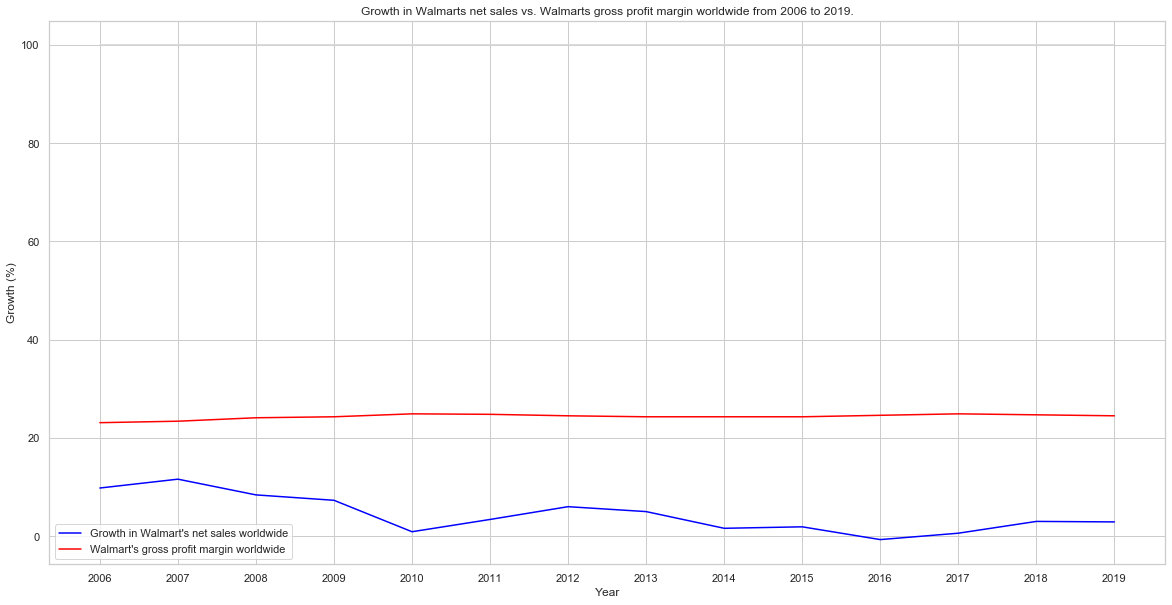

In [450]:
import matplotlib.pyplot as plt
x1 = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
y1 = [9.8, 11.6, 8.4, 7.3, 0.9, 3.4, 6.0, 5.0, 1.6, 1.9, -0.7, 0.6, 3.0, 2.9]

x2 = ['2006', '2007','2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
y2 = [23.10, 23.40, 24.10, 24.30, 24.90, 24.80, 24.50, 24.30, 24.30, 24.30, 24.60, 24.90, 24.70, 24.50]

x3 = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
y3 = [99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9, 99.9]
plt.plot(x3, y3, color='lightgrey')
plt.plot(x1, y1, label = "Growth in Walmart's net sales worldwide", color='blue' )
plt.plot(x2, y2, label = "Walmart's gross profit margin worldwide", color='red' )
plt.xlabel('Year')
plt.ylabel('Growth (%)')
plt.title('Growth in Walmarts net sales vs. Walmarts gross profit margin worldwide from 2006 to 2019.')
plt.legend()
plt.grid(True)
plt.show()


In [316]:
excel_data_df = pd.read_excel('XLS_files\walmart_chart.xlsx', sheet_name='Chart 9', skiprows= 1)

In [317]:
excel_data_df.head(50)

,Year,Spending in US$ Bn
0,2009,2.04
1,2010,2.06
2,2011,1.82
3,2012,1.81
4,2013,1.93
5,2014,1.94
6,2015,2.09
7,2016,2.17
8,2017,2.28


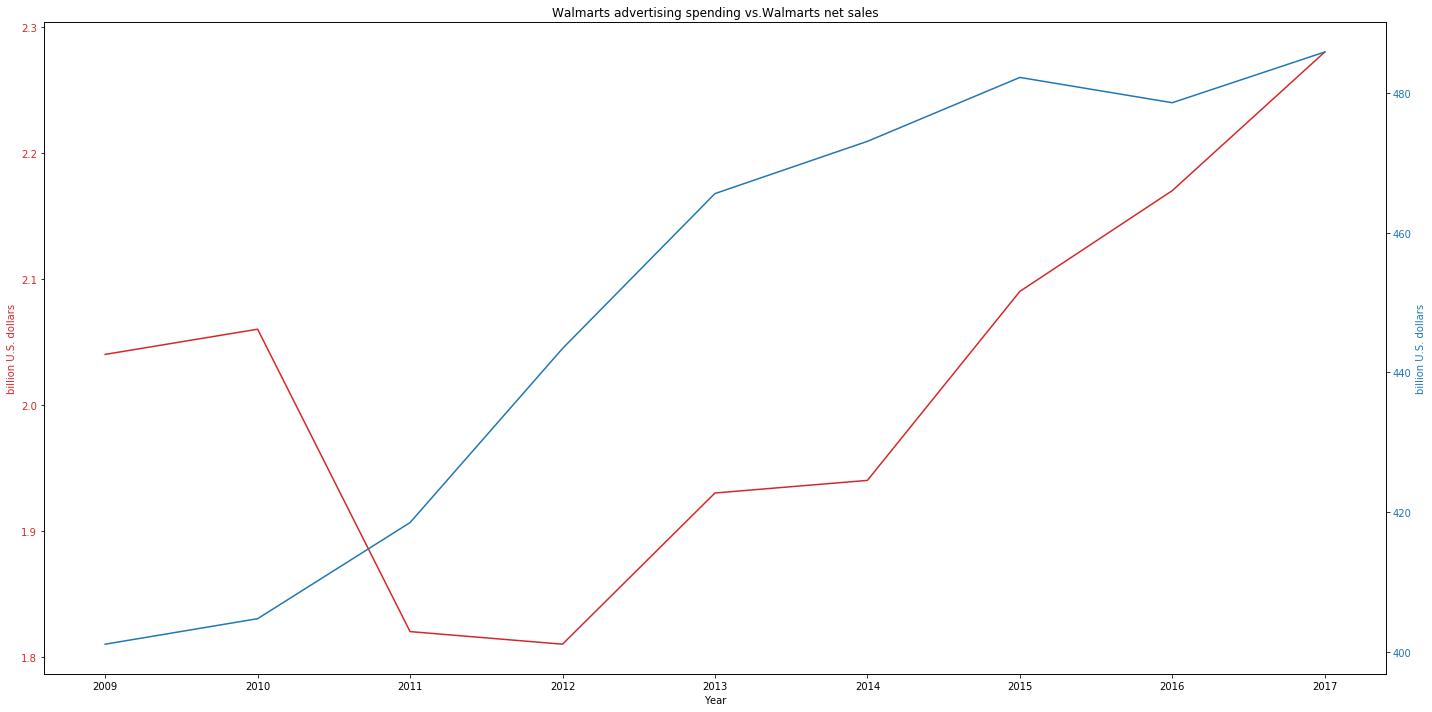

In [318]:
year = ('2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017')
y_pos = np.arange(len(year))
data1 = (2.04, 2.06, 1.82, 1.81, 1.93, 1.94, 2.09, 2.17, 2.28)
data2 = (401.09, 404.74, 418.50, 443.42, 465.60, 473.08, 482.23, 478.61, 485.87)


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('US$ Bn', color=color)
ax1.plot(year, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 
color = 'tab:blue'
ax2.set_ylabel('US$ Bn', color=color) 
ax2.plot(year, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Walmarts advertising spending vs.Walmarts net sales')

fig.tight_layout() 
plt.show()

In [319]:
excel_data_df = pd.read_excel('XLS_files\walmart_chart.xlsx', sheet_name='Chart 10', skiprows= 1)

In [320]:
excel_data_df.head(50)

,Year,Number of stores
0,2008,7288
1,2009,7909
2,2010,8099
3,2011,8604
4,2012,9766
5,2013,10408
6,2014,10942
7,2015,11453
8,2016,11528
9,2017,11695


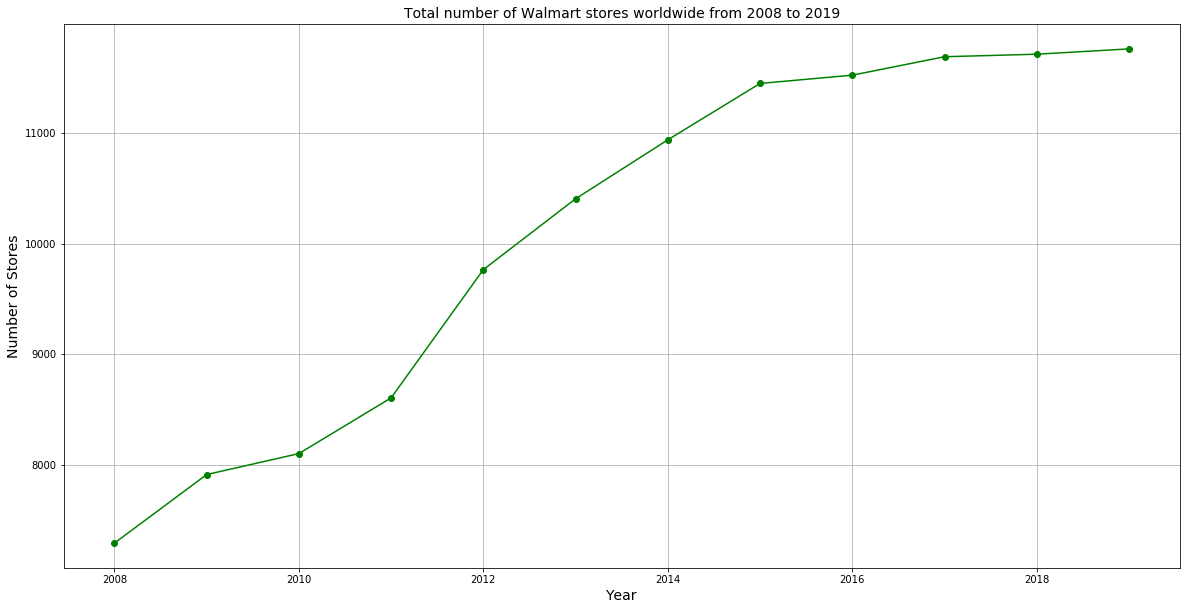

In [321]:
Data = {'Year': [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
        'Number of Stores': [7288, 7909, 8099,8604, 9766, 10408, 10942, 11453, 11528, 11695, 11718, 11766]
       }
  
df = pd.DataFrame(Data,columns=['Year','Number of Stores'])
  
plt.plot(df['Year'], df['Number of Stores'], color='green', marker='o')
plt.title('Total number of Walmart stores worldwide from 2008 to 2019', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Stores', fontsize=14)
plt.grid(True)
plt.show()

In [322]:
excel_data_df = pd.read_excel('XLS_files\walmart_chart.xlsx', sheet_name='Chart 11')

In [323]:
excel_data_df.head(50)

,Year,Walmart U.S. segment,Walmart International segment,Sam`s Club segment
0,2006,3289,2158,567
1,2007,3488,2733,588
2,2008,3595,3093,600
3,2009,3703,3595,611
4,2010,3755,4099,605
5,2011,3804,4557,609
6,2012,3868,5287,611
7,2013,4005,5783,620
8,2014,4203,6107,632
9,2015,4516,6290,647


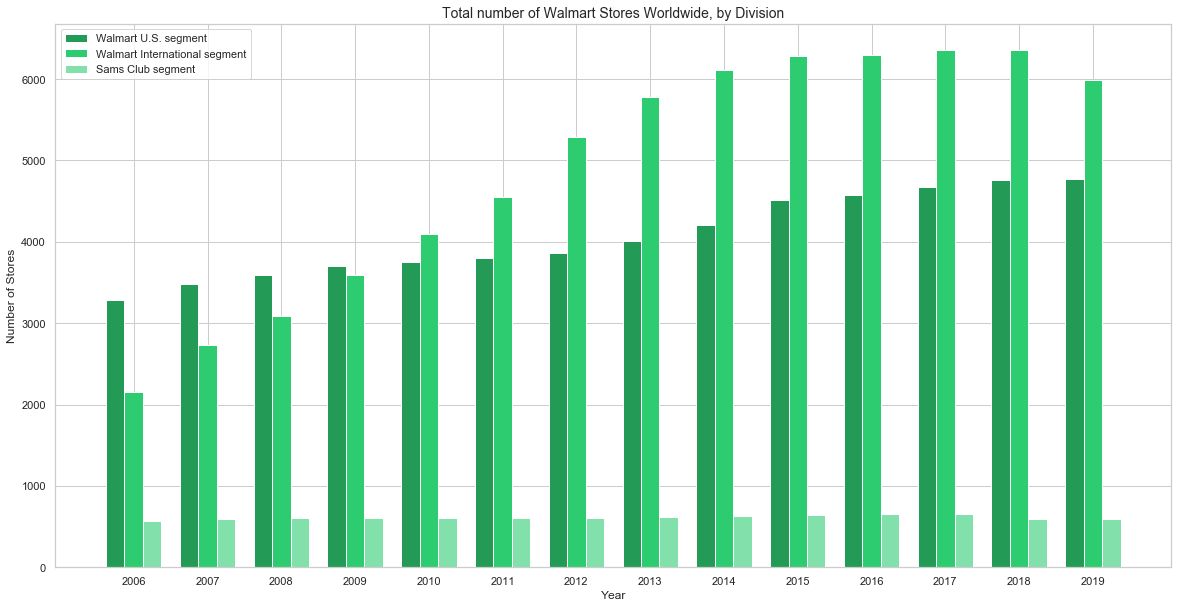

In [451]:
import numpy as np
import matplotlib.pyplot as plt
barWidth = 0.25
bars1 = [3289, 3488, 3595, 3703, 3755, 3804, 3868, 4005, 4203, 4516, 4574, 4672, 4761, 4769]
bars2 = [2158, 2733, 3093, 3595, 4099, 4557, 5287, 5783, 6107, 6290, 6299, 6363, 6360, 5993]
bars3 = [567, 588, 600, 611, 605, 609, 611, 620, 632, 647, 655, 660, 597, 599]
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
plt.bar(r1, bars1, color='#239B56', width=barWidth, edgecolor='white', label='Walmart U.S. segment')
plt.bar(r2, bars2, color='#2ECC71', width=barWidth, edgecolor='white', label='Walmart International segment')
plt.bar(r3, bars3, color='#82E0AA', width=barWidth, edgecolor='white', label='Sams Club segment')
 
plt.xlabel('Year')
plt.xticks([r + barWidth for r in range(len(bars1))], ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'])
plt.ylabel('Number of Stores')
plt.title('Total number of Walmart Stores Worldwide, by Division', fontsize=14)
plt.legend()
plt.show()


In [325]:
excel_data_df = pd.read_excel('XLS_files\walmart_chart.xlsx', sheet_name='Chart 12', skiprows= 1)

In [326]:
excel_data_df.head(50)

,Country,Number of stores
0,Africa,436
1,Argentina,92
2,Canada,411
3,Central America**,811
4,Chile,371
5,China,443
6,India,22
7,Japan,332
8,Mexico,2442
9,United States,4756


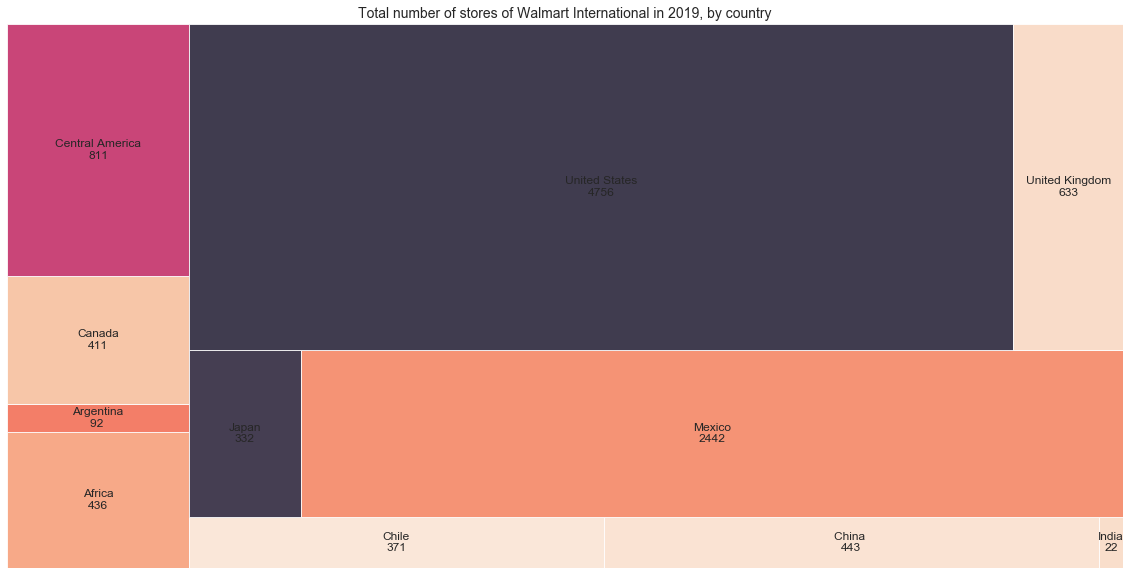

In [443]:
import squarify  
 
squarify.plot(sizes=[436, 92, 411, 811, 371, 443, 22, 332, 2442, 4756, 633], label=["Africa\n436", "Argentina\n92 ", "Canada\n411", "Central America\n811", "Chile\n371", "China \n443", "India\n22", "Japan\n332", "Mexico\n2442", "United States\n4756", "United Kingdom\n633"], alpha=.8)
plt.axis('off')
plt.title('Total number of stores of Walmart International in 2019, by country', fontsize=14)
plt.show()
 


In [372]:
excel_data_df = pd.read_excel('XLS_files\walmart_chart.xlsx', sheet_name='Chart 13', skiprows= 1)

In [374]:
excel_data_df.head(52)

,Country,No. of Stores
0,Texas,329
1,Florida,191
2,California,167
3,Illinois,137
4,Ohio,136
5,Georgia,128
6,Pennsylvania,119
7,North Carolina,118
8,Missouri,117
9,Tennesse,104


In [375]:
excel_data_df = pd.read_excel('XLS_files\walmart_chart.xlsx', sheet_name='Chart 14', skiprows= 1)

In [376]:
excel_data_df.head(52)

,Country,No. of Stores
0,Texas,392
1,Florida,231
2,California,142
3,Illinois,139
4,Ohio,139
5,Georgia,154
6,Pennsylvania,116
7,North Carolina,144
8,Missouri,112
9,Tennesse,117


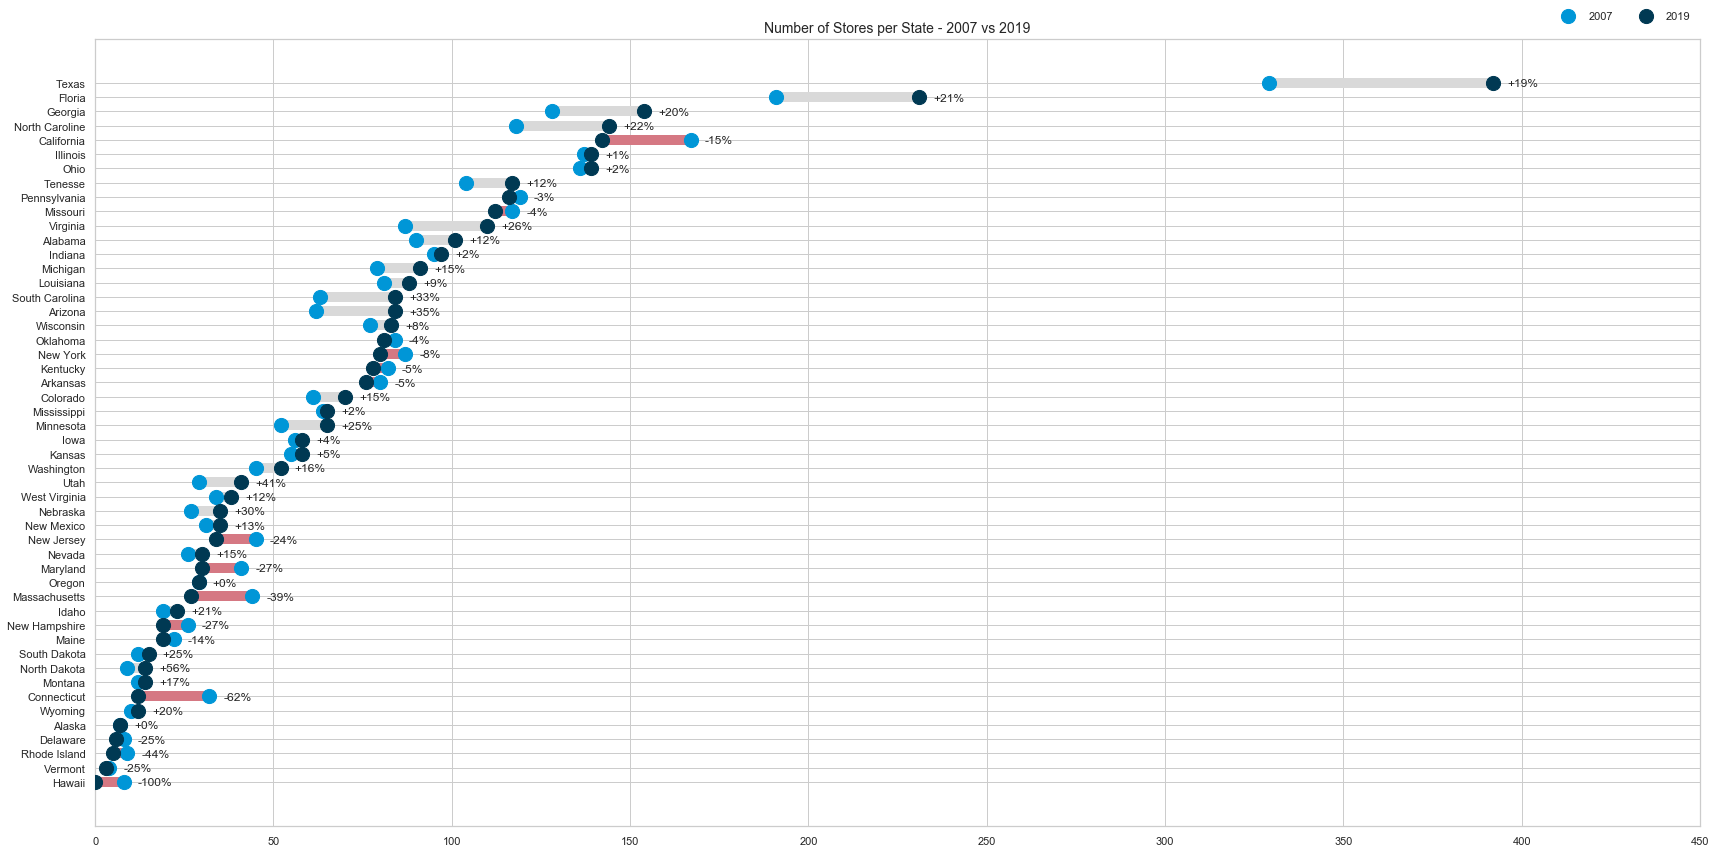

In [449]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
sns.set(style="whitegrid")  # set style

data = io.StringIO(""""State"  2007  2019
"Texas" 329 392
"Floria" 191 231
"California" 167 142
"Illinois" 137 139
"Ohio" 136 139
"Georgia" 128 154
"Pennsylvania" 119 116
"North Caroline" 118 144
"Missouri" 117 112
"Tenesse" 104 117
"Indiana" 95 97
"Alabama" 90 101
"New York" 87 80
"Virginia" 87 110
"Oklahoma" 84 81
"Kentucky" 82 78
"Louisiana" 81 88
"Arkansas" 80 76
"Michigan" 79 91
"Wisconsin" 77 83
"Mississippi" 64 65
"South Carolina" 63 84
"Arizona" 62 84
"Colorado" 61 70
"Iowa" 56 58
"Kansas" 55 58
"Minnesota" 52 65
"New Jersey" 45 34
"Washington" 45 52
"Massachusetts" 44 27
"Maryland" 41 30
"West Virginia" 34 38
"Connecticut" 32 12
"New Mexico" 31 35
"Oregon" 29 29 
"Utah" 29 41
"Nebraska" 27 35
"Nevada" 26 30
"New Hampshire" 26 19
"Maine" 22 19
"Idaho" 19 23
"Montana" 12 14
"South Dakota" 12 15
"Wyoming" 10 12
"North Dakota" 9 14
"Rhode Island" 9 5
"Delaware" 8 6
"Hawaii" 8 0
"Alaska" 7 7
"Vermont" 4 3""")

df = pd.read_csv(data, sep="\s+", quotechar='"')
df = df.set_index("State").sort_values("2019")
df["change"] = df["2019"] / df["2007"] - 1


plt.figure(figsize=(24, 12))
y_range = np.arange(1, len(df.index) + 1)
colors = np.where(df['2019'] > df['2007'], '#d9d9d9', '#d57883')
plt.hlines(y=y_range, xmin=df['2007'], xmax=df['2019'],
           color=colors, lw=10)
plt.scatter(df['2007'], y_range, color='#0096d7', s=200, label='2007', zorder=3)
plt.scatter(df['2019'], y_range, color='#003953', s=200 , label='2019', zorder=3)
for (_, row), y in zip(df.iterrows(), y_range):
    plt.annotate(f"{row['change']:+.0%}", (max(row["2007"], row["2019"]) + 4, y - 0.25))
plt.legend(ncol=2, bbox_to_anchor=(1., 1.01), loc="lower right", frameon=False)

plt.yticks(y_range, df.index)
plt.title("Number of Stores per State - 2007 vs 2019", fontsize= 14)
plt.xlim(0, 450)
plt.gcf().subplots_adjust(left=0.35)
plt.tight_layout()
plt.show()